In [38]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy.io import wavfile
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import datetime

pylab.rcParams['figure.figsize'] = 16, 8
pylab.rcParams['font.size'] = 16

In [2]:
fs, samples = wavfile.read('testsubway.wav')

In [3]:
dur = float(len(samples)) / fs
sample_len = len(samples)

print ('Sample rate: ', fs, 'Hz')
print ('Length in samples: ', sample_len)
print ('Length in seconds: ', '%.3f' % dur)
print ('Sample data type: ', samples.dtype)

Sample rate:  48000 Hz
Length in samples:  17146880
Length in seconds:  357.227
Sample data type:  int16


In [4]:
# The sample data is in the form of 16 bit integers so lets convert to floats
samples = samples / 32768.0

In [5]:
T = np.linspace(0, dur, num=sample_len)

Text(0,0.5,'Amplitude')

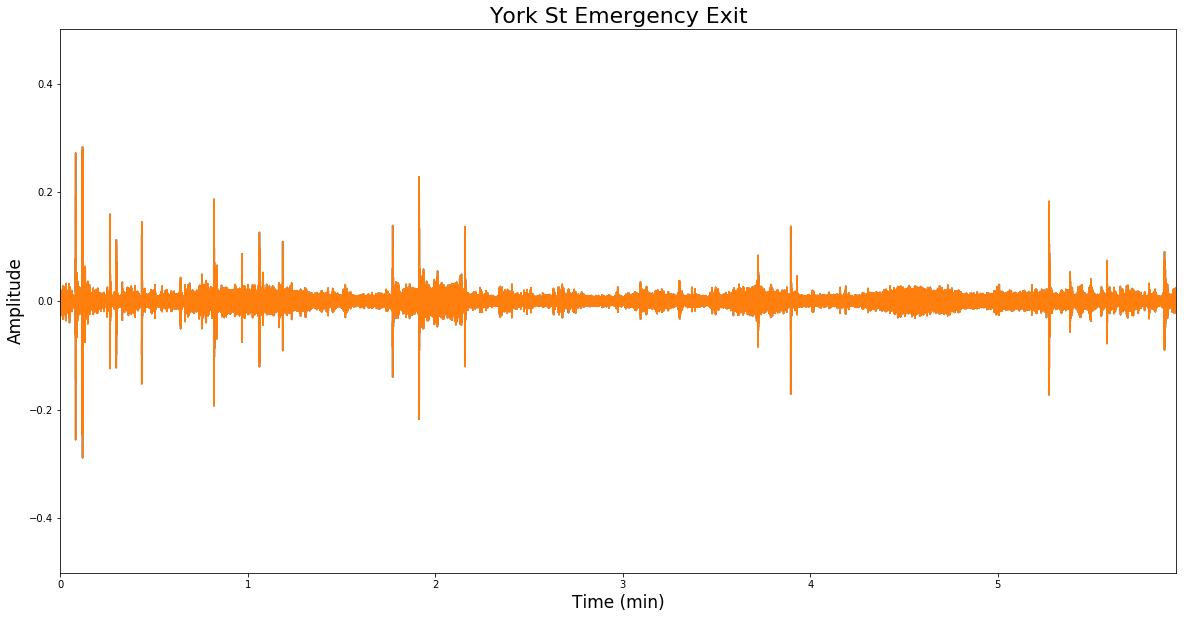

In [6]:
plt.figure(figsize=(20,10))
plt.plot(T/60, samples)
plt.ylim([-.5, .5])
plt.xlim([0, np.max(T/60)])
plt.title('York St Emergency Exit',fontsize=22)
plt.xlabel('Time (min)',fontsize=17)
plt.ylabel('Amplitude',fontsize=17)

In [109]:
df = pd.DataFrame({'Time':T/60,'Amplitude':[x[1] for x in samples.tolist()]})

In [110]:
# set threshold for amplitude at 0.75
df['Threshold_bool'] = np.where(df['Amplitude'] > .075,1,0)

# reduce dataframe to where treshold level changes
df['Threshold_change'] = df['Threshold_bool'].diff()
df = df[df['Threshold_change'] != 0]

In [116]:
# remove times not within 0.01 minutes of each other
df = df[df['Time'].diff() > 0.01]

# convert to datetime
df['Time'] = list(map(str, [datetime.timedelta(seconds=x*60*60.0) for x in df['Time']]))
df['Time'] = pd.to_datetime(df['Time'])
df

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Amplitude,Time,Threshold_bool,Threshold_change
232399,0.077972,2018-04-15 00:04:50.498767,1,1.0
336273,0.075592,2018-04-15 00:07:00.341275,1,1.0
760079,0.079193,2018-04-15 00:15:50.098805,1,1.0
857469,0.079315,2018-04-15 00:17:51.836313,1,1.0
1248024,0.077057,2018-04-15 00:26:00.030091,1,1.0
2361109,0.091339,2018-04-15 00:49:11.386422,1,1.0
2788435,0.086914,2018-04-15 00:58:05.543953,1,1.0
3056487,0.075714,2018-04-15 01:03:40.608973,1,1.0
3413954,0.097321,2018-04-15 01:11:07.442749,1,1.0
5103928,0.112915,2018-04-15 01:46:19.910372,1,1.0
